# Pipeline incidents after 2010

Data from [PHMSA](https://www.phmsa.dot.gov/data-and-statistics/pipeline/source-data)
* Includes both 'Significant' and 'non-significant' events
* Events include the following: 
    * Gas distribution
    * Gas Transmission and Gathering
    * Hazardous liquid
    
    **NOTE:** Liquified Natural Gas incidents are not included in this analysis (32 total LNG incidents since 2011)

In [6]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df = pd.read_csv('../data/processed/pipeline_incidents_2010_present_all_CLEAN.csv')
df.head(2)

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade,year_dt,pipeline_age
0,2/28/22,NO,YES,NO,20100001,15047,3/11/10,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,"PG&E - GAS OPERATIONS, REGULATORY COMPLIANCE 6...",SAN RAMON,CA,94583,2/13/10 23:35,NaN,NaN,2010.0,1617 EAST 9TH STREET,STOCKTON,SAN JOAQUIN,CA,95201,37.93188,-121.26133,102500,124764.082311,NO,0,0.0,0,OTHER OUTSIDE FORCE DAMAGE,OTHER OUTSIDE FORCE DAMAGE,OTHER,ALUMINUN,A FIRE AT AN UNOCCUPIED HOME OCCURRED AT APPRO...,10.0,NaN,NaN,NaN,NaN
1,2/28/22,NO,NO,NO,20100002,15553,3/12/10,SUPPLEMENTAL FINAL,13730,NORTHERN INDIANA PUBLIC SERVICE CO,801 E 86TH AVENUE,MERRILLVILLE,IN,46410,2/16/10 10:38,NaN,NaN,2010.0,3835 SANDPIPER COVE RUN,SOUTH BEND,ST. JOSEPH,IN,46628,41.72931,-86.27531,57500,68334.121206,NO,0,20.0,0,EXCAVATION DAMAGE,EXCAVATION DAMAGE BY THIRD PARTY,PLASTIC,NaN,"CONTRACTOR BORING ELECTRIC LINE PARALLEL TO 3""...",310.0,1990-01-01,1990-1999,1990.0,20.0


## Incidents by Installation Year

In [9]:
df['installation_year'] = pd.to_datetime(df['installation_year'], format='%Y-%m-%d')

<AxesSubplot:title={'center':'Installation years for pipeline incidents occuring 2010-Present'}>

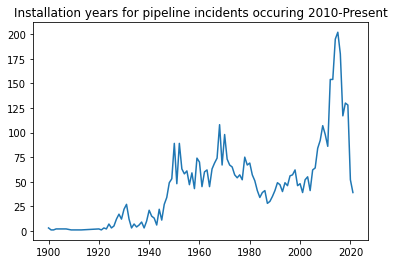

In [10]:
df.installation_year.dt.year.value_counts().sort_index()\
.plot(title='Installation years for pipeline incidents occuring 2010-Present')


In [11]:
# Making a simplified df with the count of incidents per installation year to use in visualization 
install_year = df.installation_year.dt.year.value_counts().sort_index().to_frame()\
    .reset_index()\
    .rename(columns={'index': 'installation_year', 'installation_year': 'count'})

install_year.head()

,installation_year,count
0,1900.0,3
1,1901.0,1
2,1902.0,1
3,1903.0,2
4,1906.0,2


In [ ]:
# Saving this simplified df to csv in order to plot with DataWrapper

#install_year.to_csv('install_year_viz.csv', index=False)

## Incidents by decade

In [4]:
# Create column for decade of installation
conditions = [
    (df['installation_year'] >= '1900-01-01') & (df['installation_year'] < '1910-01-01'),
    (df['installation_year'] >= '1910-01-01') & (df['installation_year'] < '1920-01-01'),
    (df['installation_year'] >= '1920-01-01') & (df['installation_year'] < '1930-01-01'),
    (df['installation_year'] >= '1930-01-01') & (df['installation_year'] < '1940-01-01'),
    (df['installation_year'] >= '1940-01-01') & (df['installation_year'] < '1950-01-01'),
    (df['installation_year'] >= '1950-01-01') & (df['installation_year'] < '1960-01-01'),
    (df['installation_year'] >= '1960-01-01') & (df['installation_year'] < '1970-01-01'),
    (df['installation_year'] >= '1970-01-01') & (df['installation_year'] < '1980-01-01'),
    (df['installation_year'] >= '1980-01-01') & (df['installation_year'] < '1990-01-01'),
    (df['installation_year'] >= '1990-01-01') & (df['installation_year'] < '2000-01-01'),
    (df['installation_year'] >= '2000-01-01') & (df['installation_year'] < '2010-01-01'),
    df['installation_year'] >= '2010-01-01'
]

outputs = [
    '1900-1909', '1910-1919', '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979',
    '1980-1989', '1990-1999', '2000-2009', '>2010'
]

df['decade'] = np.select(conditions, outputs, np.nan)
df.decade.unique()

array(['nan', '1990-1999', '1970-1979', '1980-1989', '1960-1969',
       '2000-2009', '1950-1959', '1940-1949', '>2010', '1920-1929',
       '1930-1939', '1900-1909', '1910-1919'], dtype=object)

In [5]:
# Accidents with post 2010 installation year for how many accidents with ANY installation year that occurred post 2010
len(df[df.decade == '>2010'])/ len(df[df.iyear >= 2010])

# 20.5% of all accidents that occurred post 2010 had installation years after 2010

0.20469395919455927

## Overview of incidents

In [6]:
# Total cost adjusted for inflation
df['total_cost_current'].sum()

7994914265.472826

In [7]:
# Total injuries 
df.injure.sum()

716

In [8]:
# Total deaths
df.fatal.sum()

156

In [9]:
# Total incidents
df.shape

(7499, 41)

## Incidents by installation and incident years, per miles of pipeline in the US that year
Mileage data, last updated May 2, 2022 from [PHMSA](https://www.phmsa.dot.gov/data-and-statistics/pipeline/annual-report-mileage-hazardous-liquid-or-carbon-dioxide-systems)

In [10]:
# Count number of incidents by installation year
df_count = df.installation_year.dt.strftime('%Y').value_counts().sort_index().reset_index()
df_count.columns = ['installation_year', 'installation_count']
df_count.head()

,installation_year,installation_count
0,1900,3
1,1901,1
2,1902,1
3,1903,2
4,1906,2


In [11]:
# Count number of incidents by INCIDENT year
df_incident_yr_count = df.iyear.value_counts().sort_index().reset_index()
df_incident_yr_count.columns = ['incident_year', 'incident_count']
df_incident_yr_count['incident_year'] = df_incident_yr_count.incident_year.astype('str').str.replace('.0', '', regex=False)
df_incident_yr_count.head()

,incident_year,incident_count
0,2010,586
1,2011,588
2,2012,570
3,2013,616
4,2014,703


In [12]:
df_count_merge = df_count.merge(df_incident_yr_count, left_on='installation_year', right_on='incident_year', how='left')
print(len(df_count))
print(len(df_incident_yr_count))
print(len(df_count_merge))

112
13
112


In [13]:
# Load in data with total mileage of pipelines each year
df_mileage = pd.read_csv('../data/processed/pipeline-mileage-over-time.csv')

In [14]:
# Convert mileage column to string
df_mileage['year'] = df_mileage.year.astype(str)

In [15]:
# Merge data on pipeline mileage with data on number of incidents
df_merge = df_count_merge.merge(df_mileage, left_on='installation_year', right_on='year', how='left')
df_merge.head()

,installation_year,installation_count,incident_year,incident_count,year,Gas Distribution,Gas Transmission and Gathering,Hazardous Liquid,total
0,1900,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1901,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1902,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1903,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1906,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Create column with number of pipelines installed in a year that broke, out of the total number of pipelines existing that year
df_merge['pct_incidents_install_year'] = (df_merge['installation_count'] / df_merge['total'])*100

In [17]:
df_merge.sort_values('pct_incidents_install_year', ascending=False).head(10)

,installation_year,installation_count,incident_year,incident_count,year,Gas Distribution,Gas Transmission and Gathering,Hazardous Liquid,total,pct_incidents_install_year
105,2015,202,2015,710.0,2015,2190257.0,318949.0,208622.0,2717828.0,0.007432
104,2014,195,2014,703.0,2014,2169375.0,319354.0,199795.0,2688524.0,0.007253
106,2016,180,2016,631.0,2016,2211522.0,318218.0,212164.0,2741904.0,0.006565
102,2012,154,2012,570.0,2012,2138000.0,319926.0,186221.0,2644147.0,0.005824
103,2013,154,2013,616.0,2013,2149819.0,320257.0,192412.0,2662488.0,0.005784
108,2018,130,2018,631.0,2018,2238709.0,319542.0,219137.0,2777388.0,0.004681
109,2019,128,2019,652.0,2019,2262931.0,320101.0,225001.0,2808033.0,0.004558
107,2017,117,2017,644.0,2017,2226053.0,318832.0,216052.0,2760937.0,0.004238
99,2009,107,NaN,NaN,2009,2086689.0,324936.0,175965.0,2587590.0,0.004135
100,2010,98,2010,586.0,2010,2102483.0,324432.0,181986.0,2608901.0,0.003756


In [18]:
# Create column with number of pipelines BROKEN in a year that broke, out of the total number of pipelines existing that year
df_merge['pct_incidents'] = (df_merge['incident_count'] / df_merge['total'])*100

In [19]:
df_merge.sort_values('pct_incidents', ascending=False).head(10)

,installation_year,installation_count,incident_year,incident_count,year,Gas Distribution,Gas Transmission and Gathering,Hazardous Liquid,total,pct_incidents_install_year,pct_incidents
104,2014,195,2014,703.0,2014,2169375.0,319354.0,199795.0,2688524.0,0.007253,0.026148
105,2015,202,2015,710.0,2015,2190257.0,318949.0,208622.0,2717828.0,0.007432,0.026124
107,2017,117,2017,644.0,2017,2226053.0,318832.0,216052.0,2760937.0,0.004238,0.023325
109,2019,128,2019,652.0,2019,2262931.0,320101.0,225001.0,2808033.0,0.004558,0.023219
103,2013,154,2013,616.0,2013,2149819.0,320257.0,192412.0,2662488.0,0.005784,0.023136
106,2016,180,2016,631.0,2016,2211522.0,318218.0,212164.0,2741904.0,0.006565,0.023013
108,2018,130,2018,631.0,2018,2238709.0,319542.0,219137.0,2777388.0,0.004681,0.022719
100,2010,98,2010,586.0,2010,2102483.0,324432.0,181986.0,2608901.0,0.003756,0.022462
101,2011,86,2011,588.0,2011,2121355.0,324347.0,183575.0,2629277.0,0.003271,0.022364
102,2012,154,2012,570.0,2012,2138000.0,319926.0,186221.0,2644147.0,0.005824,0.021557


In [20]:
df_merge.to_csv('../data/processed/pipeline-incidents-normalized-by-mileage.csv', index=False)

## Incident causes

In [12]:
# Counting incidents by cause
df['cause'].value_counts()

EQUIPMENT FAILURE                   2703
CORROSION FAILURE                   1285
INCORRECT OPERATION                  877
EXCAVATION DAMAGE                    774
OTHER OUTSIDE FORCE DAMAGE           598
MATERIAL FAILURE OF PIPE OR WELD     567
NATURAL FORCE DAMAGE                 426
OTHER INCIDENT CAUSE                 269
Name: cause, dtype: int64

In [13]:
# Isolating our first spike, including instal-years between 1948 and 1981
# Finding the top causes of these incidents 
df[(df.installation_year > '1948-01-01') & (df.installation_year < '1981-01-01')]\
    .cause.value_counts(ascending=False)

CORROSION FAILURE                   542
EQUIPMENT FAILURE                   363
EXCAVATION DAMAGE                   335
MATERIAL FAILURE OF PIPE OR WELD    315
OTHER OUTSIDE FORCE DAMAGE          183
INCORRECT OPERATION                 146
NATURAL FORCE DAMAGE                128
OTHER INCIDENT CAUSE                 69
Name: cause, dtype: int64

In [14]:
# Same as above but percentages 

df[(df.installation_year > '1948-01-01') & (df.installation_year < '1981-01-01')]\
    .cause.value_counts(ascending=False, normalize=True)

CORROSION FAILURE                   0.260452
EQUIPMENT FAILURE                   0.174435
EXCAVATION DAMAGE                   0.160980
MATERIAL FAILURE OF PIPE OR WELD    0.151370
OTHER OUTSIDE FORCE DAMAGE          0.087938
INCORRECT OPERATION                 0.070159
NATURAL FORCE DAMAGE                0.061509
OTHER INCIDENT CAUSE                0.033157
Name: cause, dtype: float64

In [15]:
# Isolating our second spike, including instal-years 2005 and later
# Find the top causes of these incidents using value_counts

df[df.installation_year > '2005-01-01']\
    .cause.value_counts(ascending=False)

EQUIPMENT FAILURE                   1012
INCORRECT OPERATION                  334
CORROSION FAILURE                    137
EXCAVATION DAMAGE                    107
NATURAL FORCE DAMAGE                 103
OTHER OUTSIDE FORCE DAMAGE            85
MATERIAL FAILURE OF PIPE OR WELD      61
OTHER INCIDENT CAUSE                  43
Name: cause, dtype: int64

In [16]:
# Same as above but percentages 

df[df.installation_year > '2005-01-01']\
    .cause.value_counts(ascending=False, normalize=True)

EQUIPMENT FAILURE                   0.537726
INCORRECT OPERATION                 0.177471
CORROSION FAILURE                   0.072795
EXCAVATION DAMAGE                   0.056854
NATURAL FORCE DAMAGE                0.054729
OTHER OUTSIDE FORCE DAMAGE          0.045165
MATERIAL FAILURE OF PIPE OR WELD    0.032412
OTHER INCIDENT CAUSE                0.022848
Name: cause, dtype: float64

## Misc: San Bruno, California Incident + Kalamazoo River

In [17]:
#San Bruno Incident
df[df.injure == 51]

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade,year_dt,pipeline_age
1375,2/28/22,NaN,YES,YES,20100070,17044,10/13/10,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,"PG&E - GAS OPERATIONS, REGULATORY COMPLIANCE 6...",SAN RAMON,CA,94583,9/9/10 18:11,NaN,NaN,2010.0,NaN,NaN,NaN,NaN,NaN,37.622457,-122.441898,558363000,6.794712e+08,YES,51,108.0,8,MATERIAL FAILURE OF PIPE OR WELD,ORIGINAL MANUFACTURING-RELATED (NOT GIRTH WELD...,CARBON STEEL,NaN,"AT APPROXIMATELY 1811 HOURS ON SEPTEMBER 9, 20...",47600.0,1956-01-01,1950-1959,1956.0,54.0


In [19]:
#Kalamazoo River Incident
df[df.report_number == 20100181]

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade,year_dt,pipeline_age
2970,2/28/22,NaN,YES,NO,20100181,19909,8/25/10,SUPPLEMENTAL FINAL,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",5400 WESTHEIMER COURT,HOUSTON,TX,77056,7/25/10 17:58,NaN,NaN,2010.0,NaN,NaN,NaN,NaN,NaN,42.24329,-84.97251,840526118,1.023097e+09,NO,0,61.0,0,MATERIAL FAILURE OF PIPE OR WELD,ENVIRONMENTAL CRACKING-RELATED,CARBON STEEL,NaN,"ON JULY 26, 2010, ENBRIDGE CONFIRMED A MAINLIN...",NaN,1969-01-01,1960-1969,1969.0,41.0
